In [2]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick ##これが必要！


In [3]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})



In [4]:
# 平均をグラフに追加している
def changePLOT_HIST_oneyear(name,value0,value1,times,year):
    plt.rcParams['font.family'] = 'Times New Roman'

    fig = plt.figure(figsize=(5,5))
    ax1= fig.subplots()
    ax1.hist(value0,bins=100,color='black',alpha=0.8,label='価格差がないとき')
    ax1.hist(value1,bins =100,color='gray',alpha=0.8,label='価格差があるとき')

    ax1.legend(prop ={'family':'MS Mincho'})

    title = f'{times[0]} - {times[-1]}'
    plt.title(title)
    ax1.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    # 軸の桁数を設定
    axe_num = len(str(int(ax1.get_xticks()[-1])))-2
    ax1.ticklabel_format(style="sci", axis="x", scilimits=(axe_num,axe_num)) 

    ax1.set_xlabel(name,fontname='MS Mincho')

    ax1.axvline(value0.mean(),label= '価格差がない方の平均値',color='b',alpha=0.5)
    ax1.axvline(value1.mean(),label= '価格差がある方の平均値',color='r',alpha=0.5)
    ax1.legend(prop ={'family':'MS Mincho'})
    # plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/二値HIST/各年＿平均値付き/{year}_{name}_HIST.png')


    plt.show()

In [9]:
# 広域予備率なし
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

df_select = df_king[cols].dropna()

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
       '風力誤差(実績-想定)合算値 (kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

percent =50
# これは各年

for year in range(2018,2023):
# year=2018
    start_point = dt.datetime(year,1,1,0,0)
    end_point = dt.datetime(year,12,31,23,30)
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1
    # まず、データがある分すべての相関をとる。
    target =re_col[2:3]
    for name in target:
        value0 = df[df['judge']==0][name].values
        value1 = df[df['judge']==1][name].values
        times =df['DateTime'].dt.date.values
        df.to_csv(f'../../../../Desktop/for_hane/{name}_{year}.csv',encoding='shift-jis')
        # changePLOT_HIST_oneyear(name,value0,value1,times,year)
        # print(f'ない方の平均値{round(value0.mean(),3)}、あるほうの平均値{round(value1.mean(),3)}')

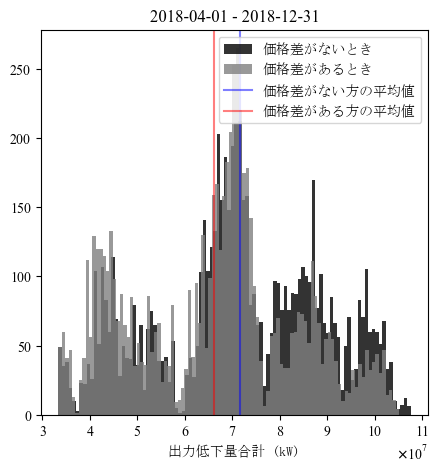

ない方の平均値71565843.77、あるほうの平均値66191961.87


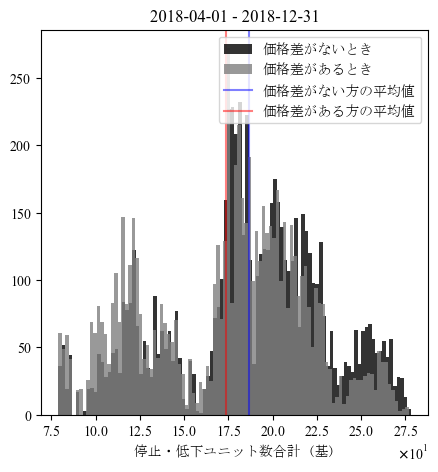

ない方の平均値186.442、あるほうの平均値173.449


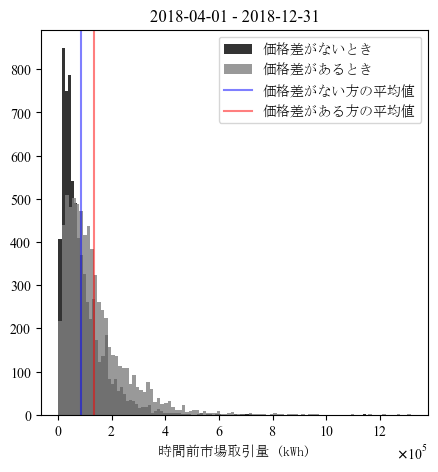

ない方の平均値86393.572、あるほうの平均値134841.814


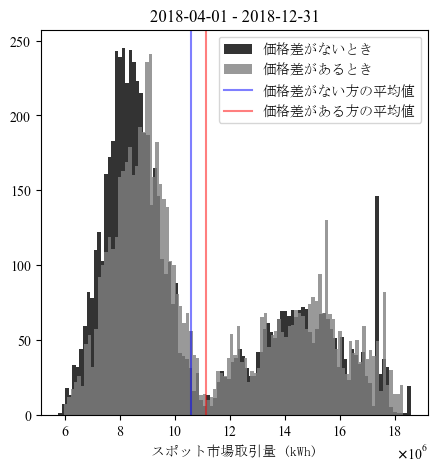

ない方の平均値10586691.283、あるほうの平均値11113680.964


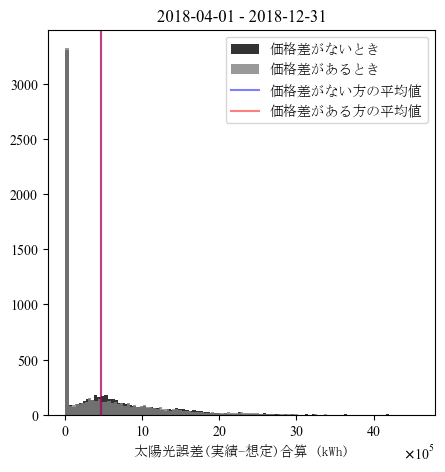

ない方の平均値459510.58、あるほうの平均値460958.327


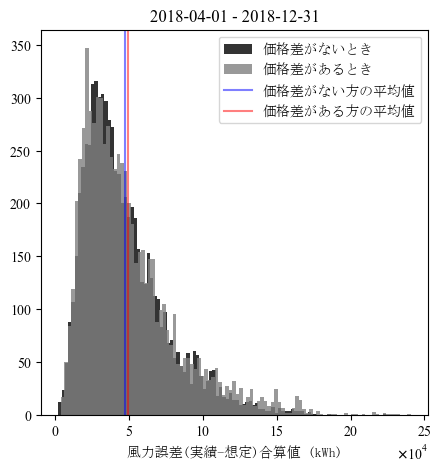

ない方の平均値47007.511、あるほうの平均値49515.188


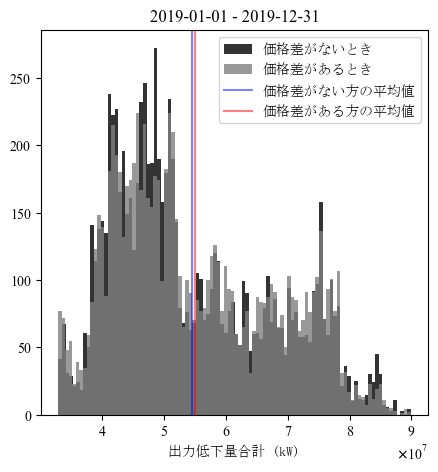

ない方の平均値54500112.841、あるほうの平均値54933074.188


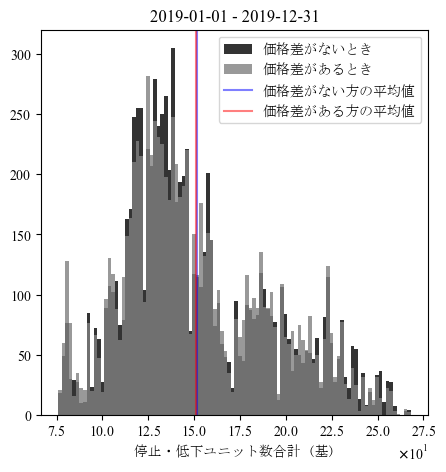

ない方の平均値151.692、あるほうの平均値151.056


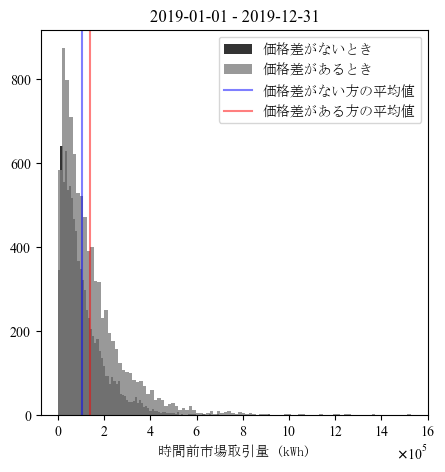

ない方の平均値104381.421、あるほうの平均値139546.592


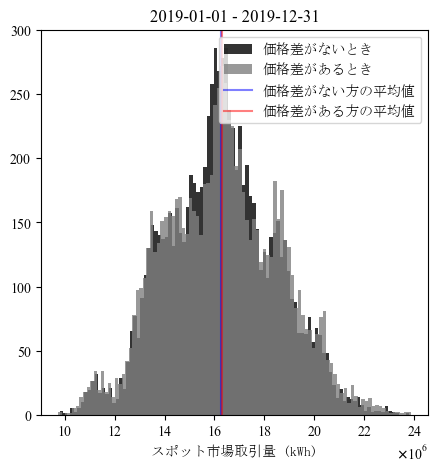

ない方の平均値16263707.083、あるほうの平均値16313325.888


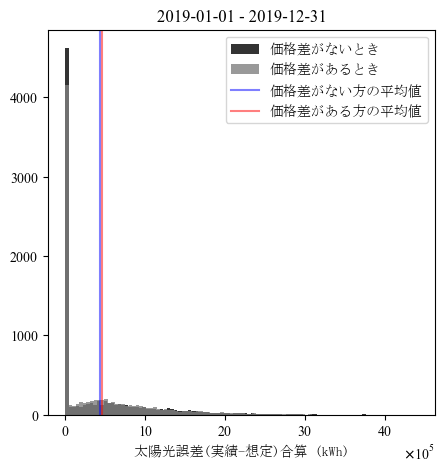

ない方の平均値434628.186、あるほうの平均値455117.673


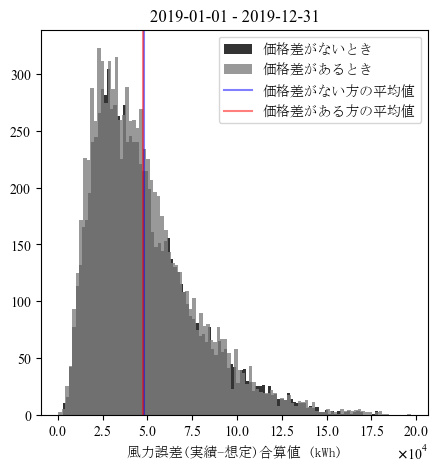

ない方の平均値47987.754、あるほうの平均値47642.982


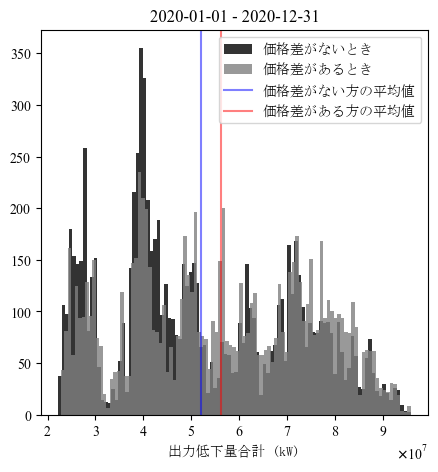

ない方の平均値51970717.991、あるほうの平均値56118824.723


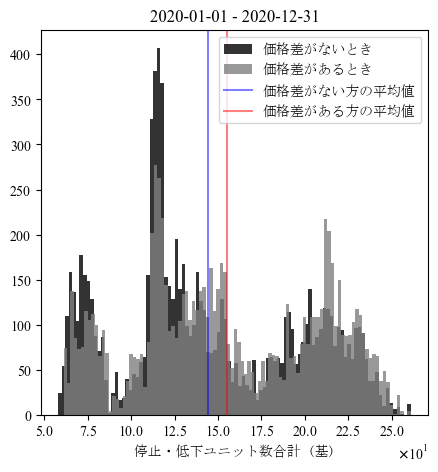

ない方の平均値144.109、あるほうの平均値155.172


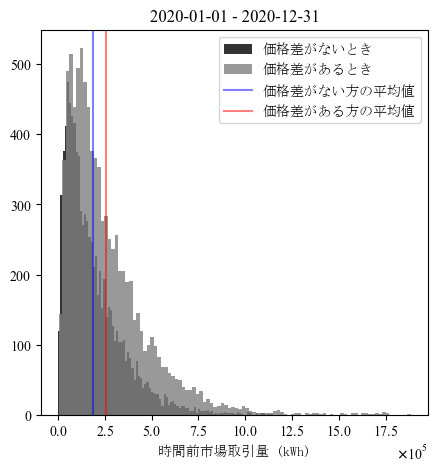

ない方の平均値188810.746、あるほうの平均値258336.09


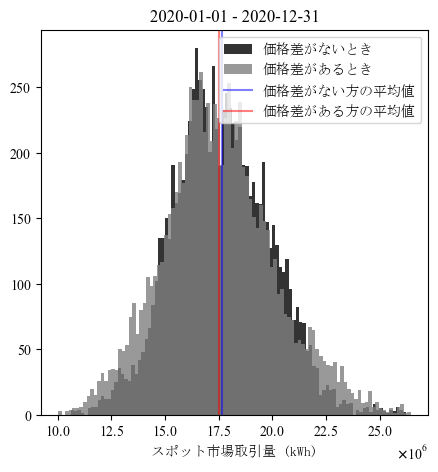

ない方の平均値17643144.593、あるほうの平均値17509151.453


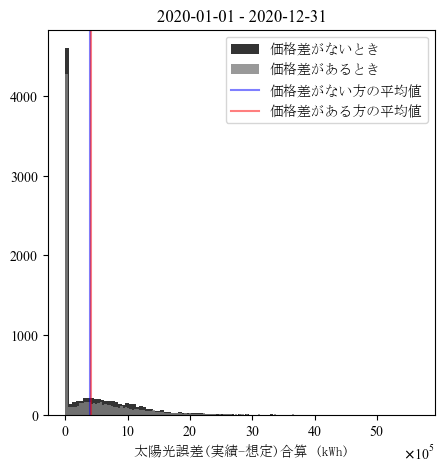

ない方の平均値392009.313、あるほうの平均値414330.561


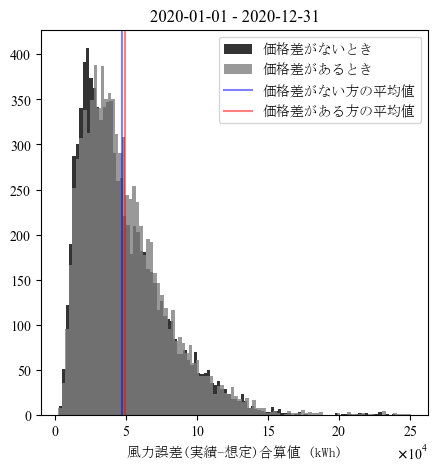

ない方の平均値46782.813、あるほうの平均値48829.27


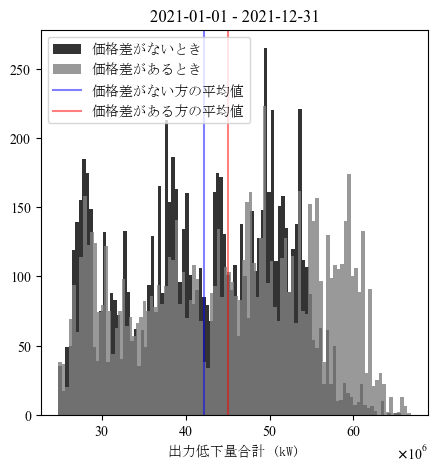

ない方の平均値42228307.122、あるほうの平均値45067159.734


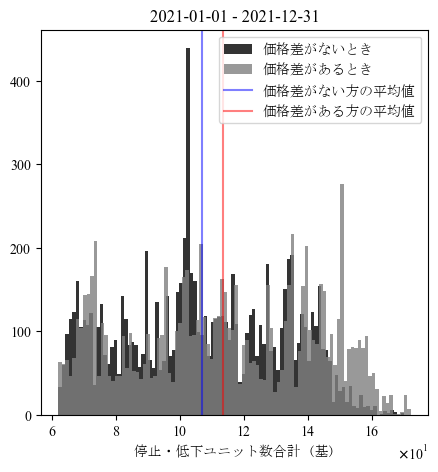

ない方の平均値106.972、あるほうの平均値113.432


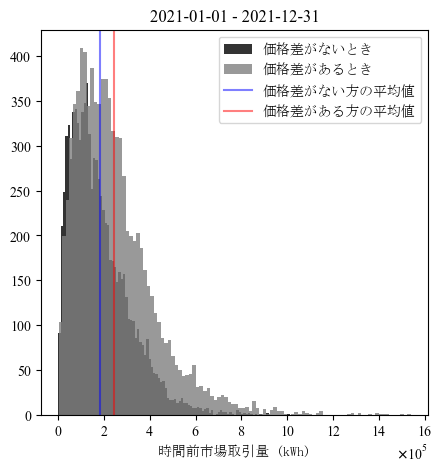

ない方の平均値182004.264、あるほうの平均値246056.869


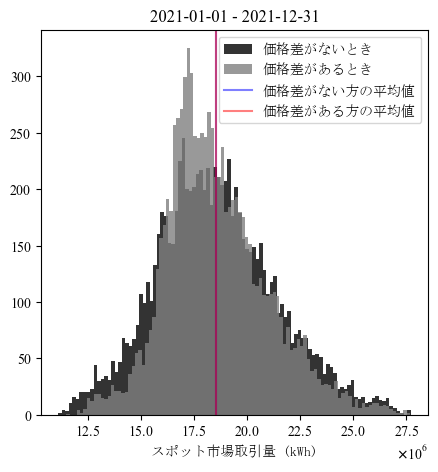

ない方の平均値18558260.714、あるほうの平均値18556891.044


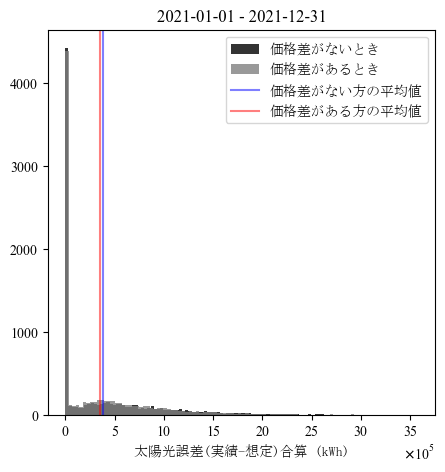

ない方の平均値382963.339、あるほうの平均値350529.777


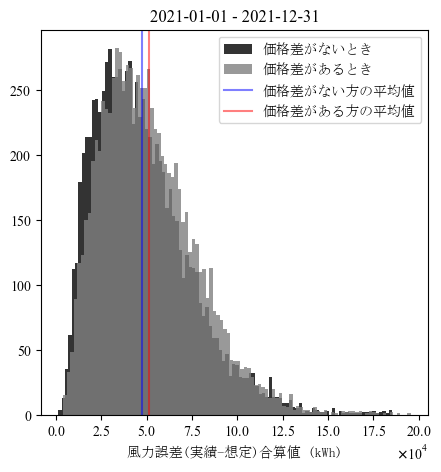

ない方の平均値47633.918、あるほうの平均値51459.236


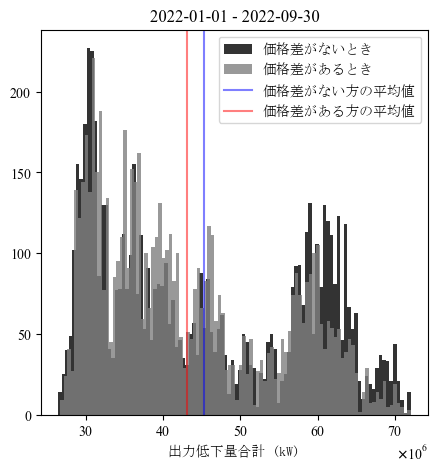

ない方の平均値45336625.742、あるほうの平均値43090121.308


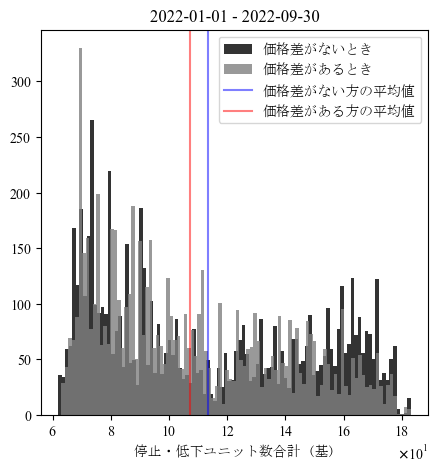

ない方の平均値113.536、あるほうの平均値107.23


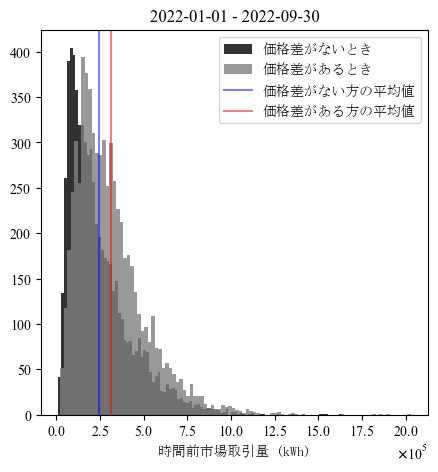

ない方の平均値245834.445、あるほうの平均値312373.954


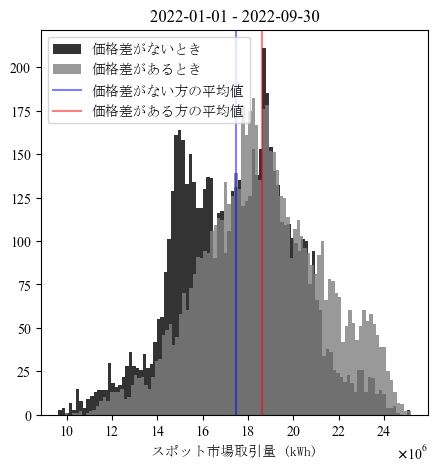

ない方の平均値17477219.927、あるほうの平均値18616669.618


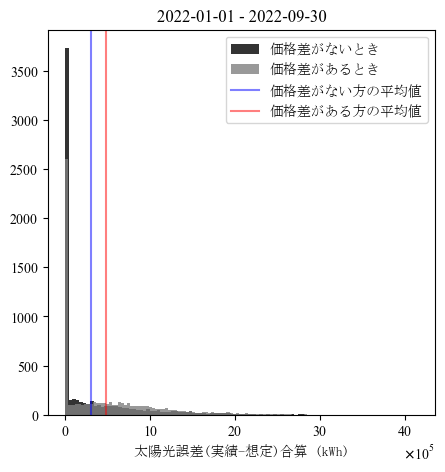

ない方の平均値298502.355、あるほうの平均値476638.166


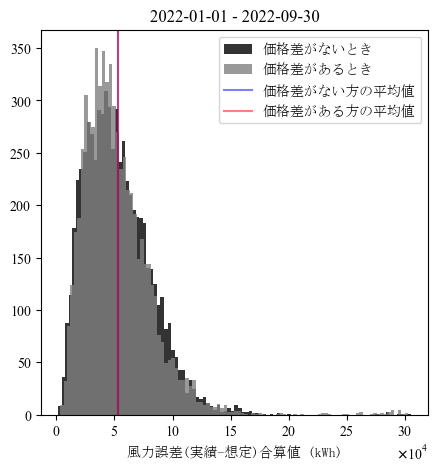

ない方の平均値53311.01、あるほうの平均値52672.391


In [5]:
# 広域予備率なし
cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

df_select = df_king[cols].dropna()

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
       '風力誤差(実績-想定)合算値 (kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

percent =50
# これは各年

for year in range(2018,2023):
# year=2018
    start_point = dt.datetime(year,1,1,0,0)
    end_point = dt.datetime(year,12,31,23,30)
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)].dropna()

    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1
    # まず、データがある分すべての相関をとる。
    target =re_col[2:]
    for name in target:
        value0 = df[df['judge']==0][name].values
        value1 = df[df['judge']==1][name].values
        times =df['DateTime'].dt.date.values
        changePLOT_HIST_oneyear(name,value0,value1,times,year)
        print(f'ない方の平均値{round(value0.mean(),3)}、あるほうの平均値{round(value1.mean(),3)}')